## Scenario

You work for a major candy producer, and your goal is to write a report that your company can use to guide the design of its next product.  Soon after starting your research, you stumble across this interesting dataset containing results from a fun survey to crowdsource favorite candies.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up our feedback system.

In [2]:
# Set up code checking
import os
if not os.path.exists("../input/candy.csv"):
    os.symlink("../input/data-for-datavis/candy.csv", "../input/candy.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex4 import *
print("Setup Complete")

Setup Complete


## Step 1: Load the Data

In [29]:
# Path of the file to read
candy_filepath = "../input/candy.csv"

candy_data = pd.read_csv(candy_filepath, index_col="id")
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


## Step 2: Review the data

In [30]:
# Print the first five rows of the data
candy_data.tail() # Your code here

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
78,Twizzlers,No,Yes,No,No,No,No,No,No,No,0.220,0.116,45.466282
79,Warheads,No,Yes,No,No,No,No,Yes,No,No,0.093,0.116,39.011898
80,Welch's Fruit Snacks,No,Yes,No,No,No,No,No,No,Yes,0.313,0.313,44.375519
81,Werther's Original Caramel,No,No,Yes,No,No,No,Yes,No,No,0.186,0.267,41.904308
82,Whoppers,Yes,No,No,No,No,Yes,No,No,Yes,0.872,0.848,49.524113


In [38]:
candy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    83 non-null     object 
 1   chocolate         83 non-null     object 
 2   fruity            83 non-null     object 
 3   caramel           83 non-null     object 
 4   peanutyalmondy    83 non-null     object 
 5   nougat            83 non-null     object 
 6   crispedricewafer  83 non-null     object 
 7   hard              83 non-null     object 
 8   bar               83 non-null     object 
 9   pluribus          83 non-null     object 
 10  sugarpercent      83 non-null     float64
 11  pricepercent      83 non-null     float64
 12  winpercent        83 non-null     float64
dtypes: float64(3), object(10)
memory usage: 9.1+ KB


## Step 3: The role of sugar

Do people tend to prefer candies with higher sugar content?  

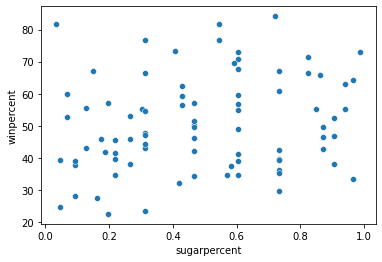

In [32]:
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])
plt.show()

<b>Conclusion:</b> 
The scatter plot does not show a strong correlation between the two variables. Since there is no clear relationship between the two variables, this tells us that sugar content does not play a strong role in candy popularity.

## Step 4: Take a closer look

Create the same scatter plot you created in **Step 3**, but now with a regression line!

<AxesSubplot:xlabel='sugarpercent', ylabel='winpercent'>

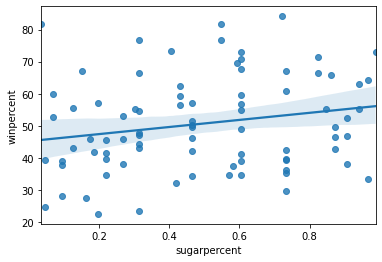

In [33]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

<b>Conclusion:</b> Since the regression line has a slightly positive slope, this tells us that there is a slightly positive correlation between 'winpercent' and 'sugarpercent'. Thus, people have a slight preference for candies containing relatively more sugar.

## Step 5: Chocolate!

In the code cell below, create a scatter plot to show the relationship between `'pricepercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis). Use the `'chocolate'` column to color-code the points.

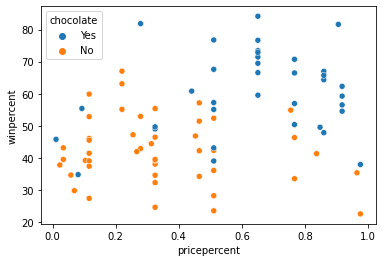

In [35]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])
plt.show()

Can you see any interesting patterns in the scatter plot?  We'll investigate this plot further  by adding regression lines in the next step!


## Step 6: Investigate chocolate

Create the same scatter plot you created in **Step 5**, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

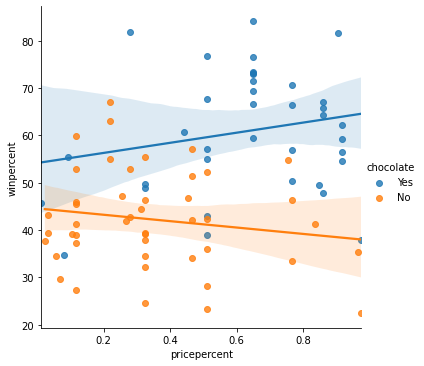

In [36]:
# Color-coded scatter plot w/ regression lines
sns.lmplot(x="pricepercent", y="winpercent", hue="chocolate", data=candy_data)
plt.show()

<b>Conclusion:</b>
We'll begin with the regression line for chocolate candies. Since this line has a slightly positive slope, we can say that more expensive chocolate candies tend to be more popular (than relatively cheaper chocolate candies). Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper. One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns! To inspire more confidence in the results, we should add more candies to the dataset.

## Step 7: Everybody loves chocolate.

Create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.

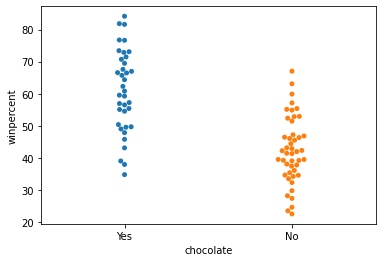

In [39]:
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])
plt.show()

<b>Conclusion:</b>
In this case, the categorical scatter plot from Step 7 is the more appropriate plot. While both plots tell the desired story, the plot from Step 6 conveys far more information that could distract from the main point.